#First Derivatives of Reflectance

The code calculates aeverage relectance, interpolates the 1nm reflectance to 10nm and computes first derivatives. The code also exports derivative data to excel file.



**We begin by importing relevant packages**

In [37]:

##operational packages

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

##visualization packages
import matplotlib.pyplot as plt
import seaborn as sns



Mounted at /content/gdrive


#Loading Data into Google Colab

***We want to load the excel book and call each worksheet.
This saves us time from saving each worksheet seperately as a .csv file***

If you want to do instrument offset correction, you can do them before uploading the excel sheet. Also,before uploading the data, make sure to remove the bands with atmospheric noise. I have a seperate code the corrects the instrument offset

In [38]:
# We import each work book, and select the individual worksheet. Make sure your excel file is uploaded onto google drive
Lynn =pd.ExcelFile ("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_Nov_15.xlsx")


JanD_S10_S6 = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_Nov_Site_6_10.xlsx")

JanD = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_Nov_JanD.xlsx")
JanD6 = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_Nov_JanD6.xlsx")
Nov_Site7 = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_Nov_Site_7.xlsx")
#Nov_Rye_Soil = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_Nov_rye_soil.xlsx")
Nov_Soil = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_Nov_soil.xlsx")
October_3 = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_October_03_2023.xlsx")
October_10 = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_October_10_2023.xlsx")
September_15 = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_September_15_2023.xlsx")
September_15_SK_Grass = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_September_15_2023_SK_Grass.xlsx")
September_15_SK_Grass_Weed = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_September_15_2023_SK_Grass_weed.xlsx")
Lynn5_b = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_Nov_2023_Lynn5_b.xlsx")
KB30 = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_Nov_15_KB30 .xlsx")
Lynn5 = pd.ExcelFile("/content/gdrive/MyDrive/Fall 2023 Field Data/Fall 2023 Intru n Atm Corrected/offset_corr_correction_Nov_15_Lynn5.xlsx")




In [39]:
Lynn5_BeanRes = pd.read_excel(Lynn5_b, "Lynn5_BeanRes")
Lynn5_CornRes = pd.read_excel(Lynn5_b, "Lynn5_CornRes")
Lynn5_Soil= pd.read_excel(Lynn5, "Lynn5_Soil")
Lynn4_Soil = pd.read_excel(Lynn, "Lynn4_Soil")
Lynn4_CornRes = pd.read_excel(Lynn, "Lynn4_CornRes")
Lynn3_CornRes = pd.read_excel(Lynn, "Lynn3_CornRes")
Lynn3_BeanRes = pd.read_excel(Lynn, "Lynn3_BeanRes")
Lynn3_Soil = pd.read_excel(Lynn, "Lynn3_Soil")
Lynn2_CornRes = pd.read_excel(Lynn, 'Lynn 2 CornRes')
Lynn2_BeanRes = pd.read_excel(Lynn, "Lynn1_BeanRes")
Lynn2_Soil = pd.read_excel(Lynn, "Lynn2_Soil")
Lynn1_CornRes = pd.read_excel(Lynn, 'Lyn1_CornRes')
Lynn1_BeanRes = pd.read_excel(Lynn, "Lynn1_BeanRes")
Lynn1_Soil = pd.read_excel(Lynn, "Lynn1_Soil")

In [40]:

JanD10_Soil = pd.read_excel(JanD, "Jan10D_Soil")
JanD10_Rye = pd.read_excel(JanD, "JanD10_Rye")
JanD10_CornRes = pd.read_excel(JanD, "JanD10_CornRes")
JanD10_BeanRes = pd.read_excel(JanD, "JanD10_BeanRes")
JanD9_Soil = pd.read_excel(Nov_Site7, "JanD9_Soil")
JanD9_Rye = pd.read_excel(Nov_Site7, "JanD9_Rye")
JanD9_CornRes = pd.read_excel(Nov_Site7, "JanD9_CornRes")
JanD9_BeanRes = pd.read_excel(Nov_Site7, "JanD9_BeanRes")
JanD8_Soil = pd.read_excel(Nov_Site7, "JanD8_Soil")
JanD8_Rye = pd.read_excel(Nov_Site7, "JanD8_Rye")
JanD8_CornRes = pd.read_excel(Nov_Site7, "JanD8_CornRes")
JanD8_BeanRes = pd.read_excel(Nov_Site7, "JanD8_BeanRes")
JanD7_Soil = pd.read_excel(Nov_Site7, "JanD7_Soil")
JanD7_Rye = pd.read_excel(Nov_Site7, "JanD7_Rye")
JanD7_CornRes = pd.read_excel(Nov_Site7, "JanD7_CornRes")
JanD6_Soil = pd.read_excel(JanD6, "JanD6_Soil")
JanD6_Rye = pd.read_excel(JanD6, "JanD6_Rye")
JanD6_CornRes = pd.read_excel(JanD_S10_S6, "JanD6_CornRes")
JanD6_BeanRes = pd.read_excel(JanD_S10_S6, "JanD6_BeanRes")


JB25_Soil = pd.read_excel(October_3, "JB25_Soil")
JB25_DrySoybean = pd.read_excel(October_3, "JB25_DrySoybean")
JB24_Soil = pd.read_excel(October_3, "JB24_Soil")
JB24_DrySoybean = pd.read_excel(October_3, "JB24_DrySoybean")
JB23_Soil = pd.read_excel(October_3, "JB23_Soil")
JB23_DrySoybean = pd.read_excel(October_3, "JB23_DrySoybean")
JB22_Soil = pd.read_excel(October_3, "JB22_Soil")
JB22_DrySoybean = pd.read_excel(October_3, "JB_22_DryBean")
JB21_Soil = pd.read_excel(October_3, "JB21_Soil")
JB21_DrySoybean = pd.read_excel(October_3, "JB21_DrySoybean")
JB21_RockyRoad = pd.read_excel(October_3, "JB21_10D_ROckyRoad")

KB30_Soil = pd.read_excel(KB30, "KB30_Soil")
KB30_DrySoybean = pd.read_excel(KB30, "KB30_DrySoyabean")
KB29_Soil = pd.read_excel(October_10, "KB29_Soil")
KB29_DrySoybean = pd.read_excel(October_10, "KB29_DrySoybean")
KB28_Soil = pd.read_excel(October_10, "KB28_Soil")
KB28_DrySoybean = pd.read_excel(October_10, "KB28_DrySoybean")
KB27_Soil = pd.read_excel(October_10, "KB27_Soil")
KB27_DrySoybean = pd.read_excel(October_10, "KB27_DrySoybean")
KB26_GreenOat = pd.read_excel(October_10, "KB26_Green_Oat")

SK35_Soil = pd.read_excel(September_15, "SK35_Soil")
SK35_GrassWeed = pd.read_excel(September_15, "SK35_GrassWeed")
SK33_Soil = pd.read_excel(September_15, "SK33_Soil")
SK33_GrassWeed = pd.read_excel(September_15, "SK33_GrassWeed")
SK32_Soil = pd.read_excel(September_15, "SK32_Soil")
SK32_GrassWeed = pd.read_excel(September_15, "SK32_GrassWeed")
SK31_Soil = pd.read_excel(September_15, "SK31_Soil")
SK31_GrassWeed = pd.read_excel(September_15,"SK31_GrassWeed")
SK34_GrassWeed = pd.read_excel(September_15_SK_Grass_Weed,"SK34_GrassWeed")
SK34_Soil = pd.read_excel(Nov_Soil, "Sheet1")











#Computing Mean Percentage Reflectance, and Derivatives

This function calculates the mean avaerage reflectance of the sample and

multiplies it by 100

In [41]:
def mean_reflectance (sample):
  sample["Mean Reflectance"] = sample.drop('Wavelength', axis=1).mean(axis=1)*100
  return sample["Mean Reflectance"]

Text(0, 0.5, 'Reflectance (%)')

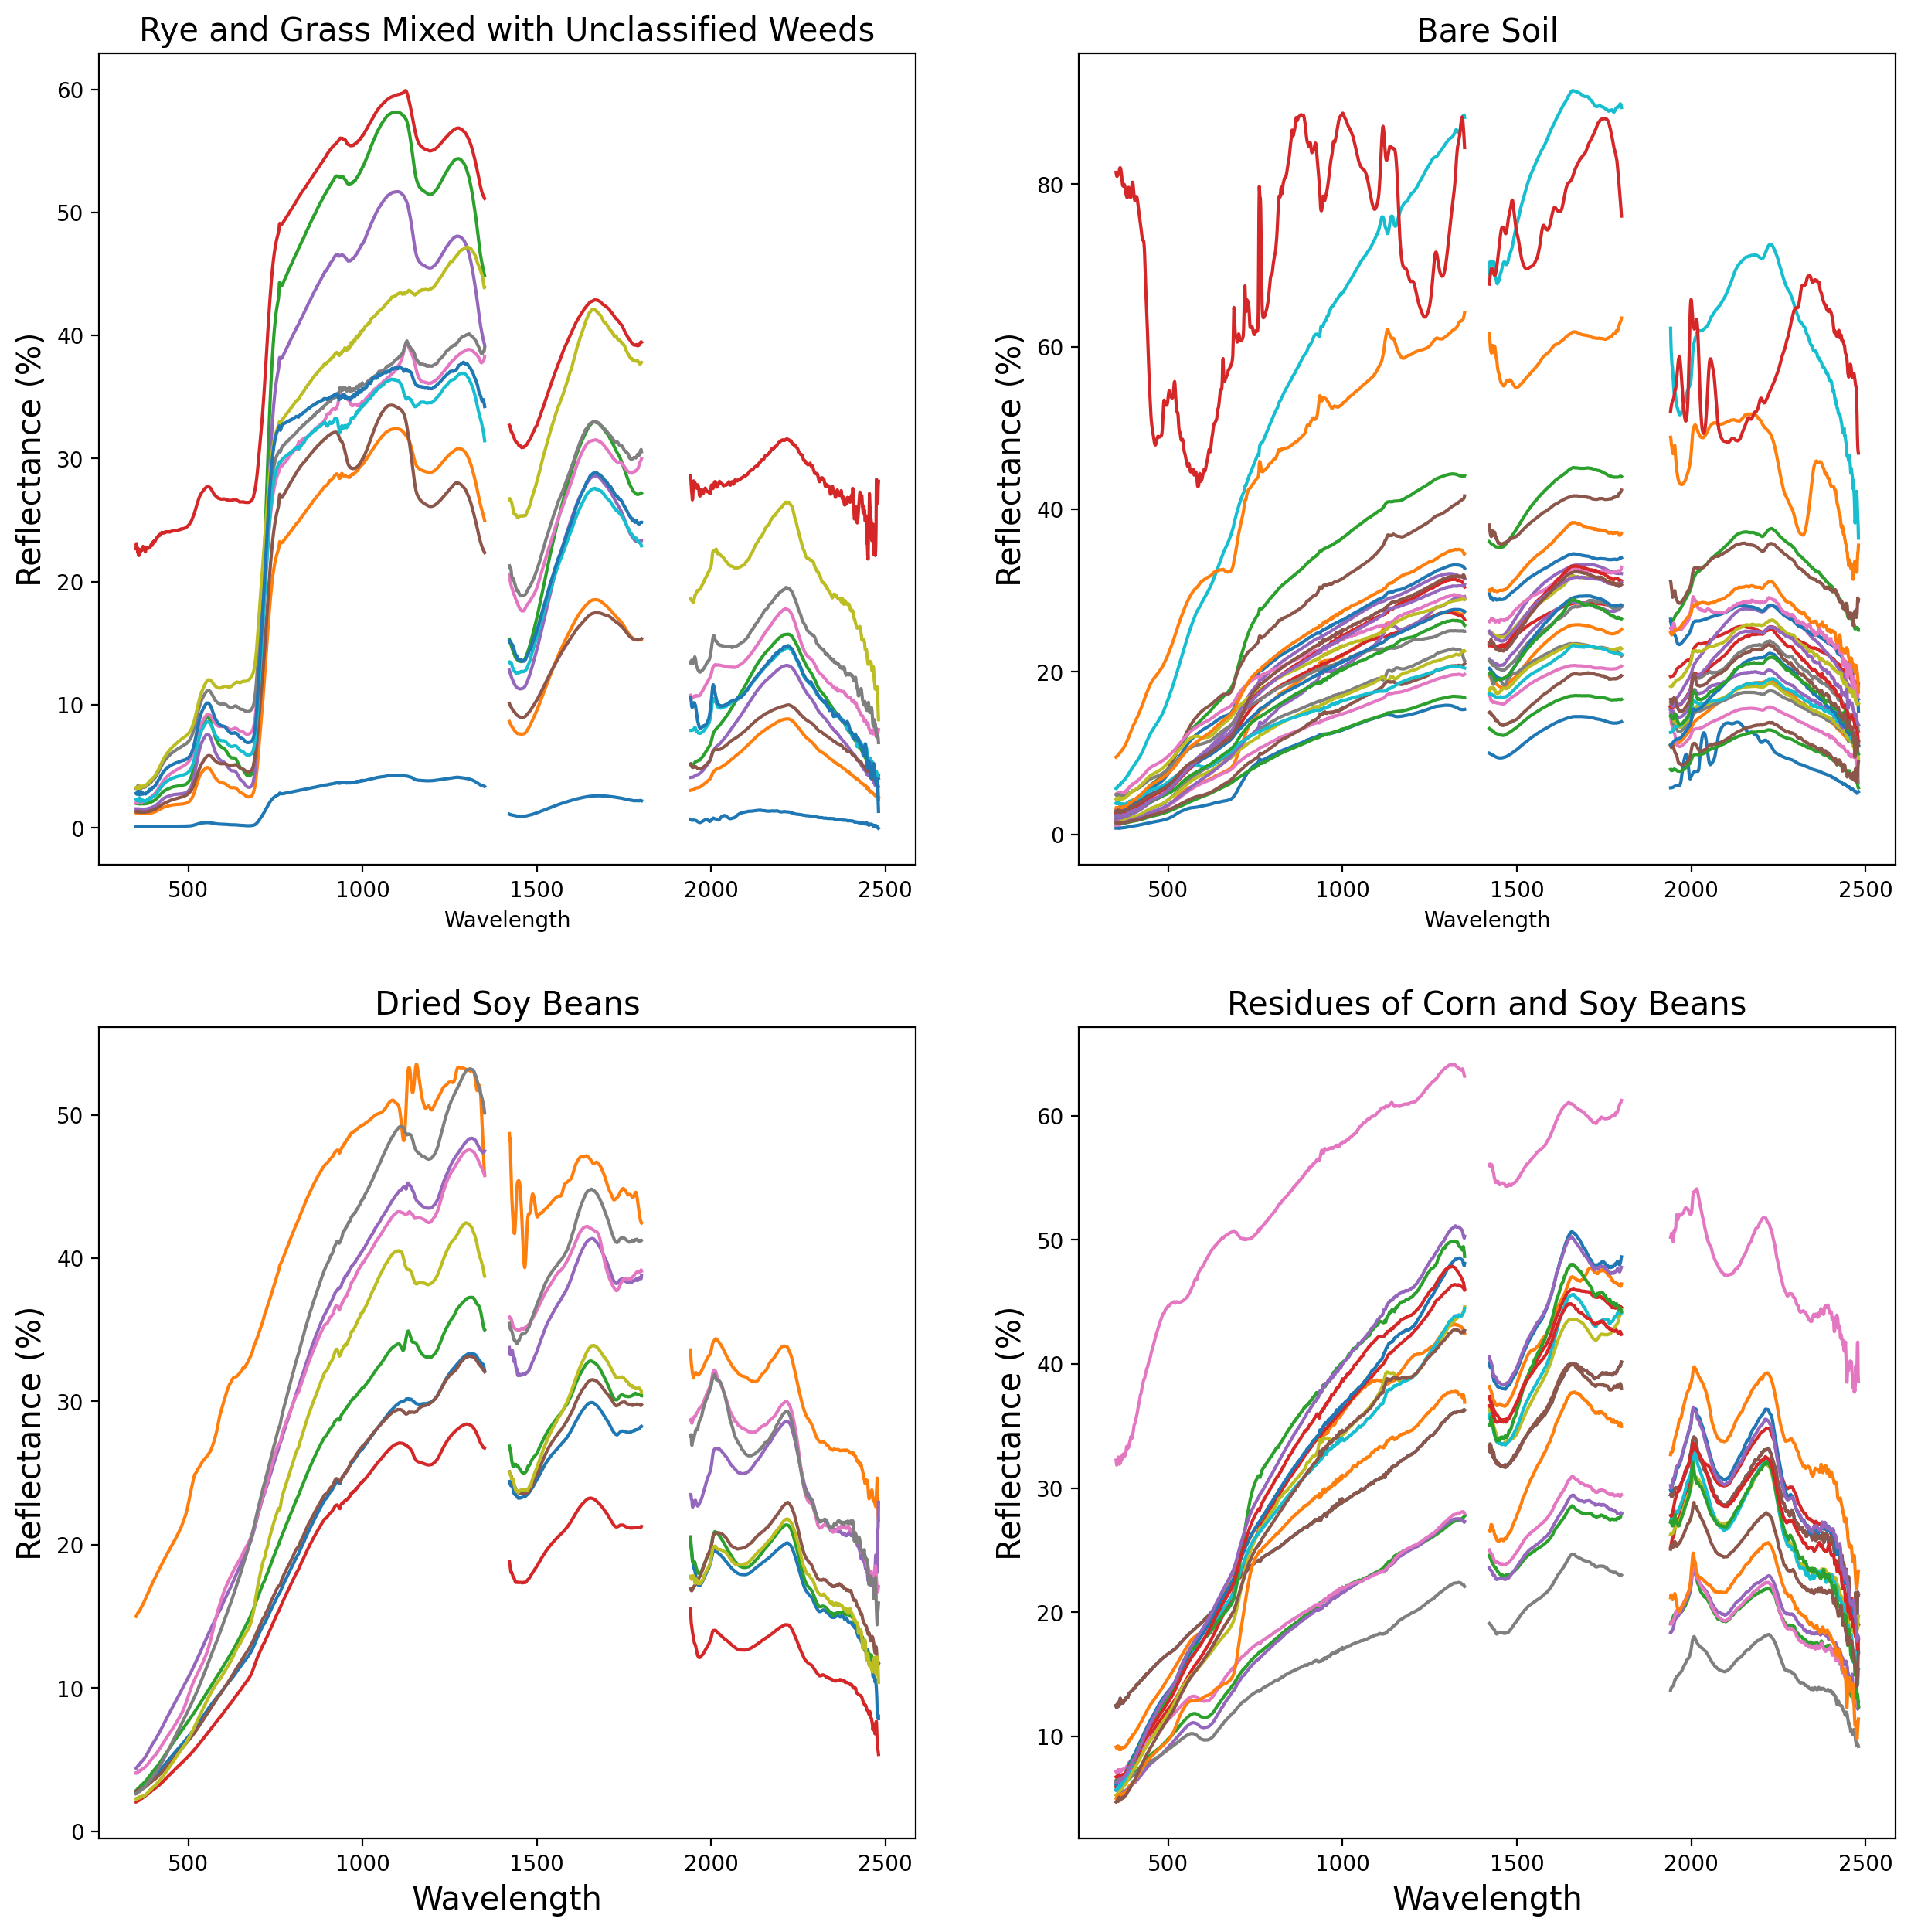

In [ ]:

%config InlineBackend.figure_format='retina'
wavelength = JanD10_Rye['Wavelength'] #We only need wavelength columns
fig,axs = plt.subplots(2,2, figsize =(15,15))

axs[0,0].plot(wavelength, mean_reflectance(SK31_GrassWeed))
axs[0,0].plot(wavelength, mean_reflectance(SK32_GrassWeed))
axs[0,0].plot(wavelength, mean_reflectance(SK33_GrassWeed))
axs[0,0].plot(wavelength,mean_reflectance( SK34_GrassWeed))
axs[0,0].plot(wavelength, mean_reflectance(SK35_GrassWeed))
axs[0,0].plot(wavelength, mean_reflectance(KB26_GreenOat))

axs[0,0].plot(wavelength, mean_reflectance(JanD10_Rye))
axs[0,0].plot(wavelength, mean_reflectance(JanD9_Rye))
axs[0,0].plot(wavelength, mean_reflectance(JanD8_Rye))
axs[0,0].plot(wavelength, mean_reflectance(JanD7_Rye))
axs[0,0].plot(wavelength, mean_reflectance(JanD6_Rye))

# axs[0].legend(labels = ['ZachA_15_Weeds','ZachA_14_Weeds', 'ZachA_13_Weeds', 'ZachA_12_Wheat', 'ZachA_11_Wheat',
#                   'SK_5_Grass','SK_4_Grass', 'SK_3_Grass', 'SK_2_Grass', 'SK_1_Grass', 'KB_5_Wheat',
#                   'KB_5_Drying_Wheat', 'KB_4_Dry_Rye', 'JB_1_Soya_Bean', 'JB_Grass_Filt', 'JanD_S10_Weeds',
#                   'JanD_S9_Weeds', 'JanD_S6_Weed', 'JanD_S6_Weed_2', 'JanD_S6_Weed_3' ],loc='center left', bbox_to_anchor=(1, 0.5))

axs[0,0].set_title("Rye and Grass Mixed with Unclassified Weeds", fontsize = '15')
axs[0,0].set_xlabel('Wavelength')
axs[0,0].set_ylabel('Reflectance (%)', fontsize = '15')


axs[0,1].plot(wavelength, mean_reflectance(SK31_Soil))
axs[0,1].plot(wavelength, mean_reflectance(SK32_Soil))
axs[0,1].plot(wavelength, mean_reflectance(SK33_Soil))
axs[0,1].plot(wavelength, mean_reflectance(SK34_Soil))
axs[0,1].plot(wavelength,mean_reflectance(SK35_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JB21_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JB22_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JB23_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JB24_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JB24_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JB25_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JB21_RockyRoad))
axs[0,1].plot(wavelength, mean_reflectance(KB27_Soil))
axs[0,1].plot(wavelength, mean_reflectance(KB28_Soil))
axs[0,1].plot(wavelength, mean_reflectance(KB29_Soil))
axs[0,1].plot(wavelength, mean_reflectance(KB30_Soil))
axs[0,1].plot(wavelength, mean_reflectance(Lynn1_Soil))
axs[0,1].plot(wavelength, mean_reflectance(Lynn2_Soil))
axs[0,1].plot(wavelength, mean_reflectance(Lynn3_Soil))
axs[0,1].plot(wavelength, mean_reflectance(Lynn5_Soil))
axs[0,1].plot(wavelength, mean_reflectance(Lynn4_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JanD10_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JanD9_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JanD8_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JanD7_Soil))
axs[0,1].plot(wavelength, mean_reflectance(JanD6_Soil))


axs[0,1].set_title("Bare Soil", fontsize = '15')
axs[0,1].set_xlabel('Wavelength')
axs[0,1].set_ylabel('Reflectance (%)', fontsize = '15')
# axs[1].legend(labels=['ZachA_15_Soil','ZachA_14_Soil', 'ZachA_13_Soil','ZachA_11_Soil',
#                       'LynnW05_Soil', 'LynnW04_Soil','LynnW03_Soil','LynnW02_Soil',
#                       'LynnW01_Soil', 'SK_5_Soil', 'SK_4_Soil', 'SK_3_Soil', 'SK_2_Soil',
#                       'SK_1_Soil', 'KB_5_Soil', 'KB_4_Soil', 'KB_3_Soil', 'KB_1_Soil',
#                       'JB_5_Soil', 'JB_4_Soil', 'JB_3_Soil', 'JB_2_Soil', 'JB_1_Soil',
#                       'JB_0_Road', 'ZachA_12_Road', 'JanD_S8_Bare_Soil', 'JanD_S6_Bare_Soil'
#                       ], loc='center left', bbox_to_anchor=(1, 0.5))


axs[1,0].plot(wavelength, mean_reflectance(JB25_DrySoybean))
axs[1,0].plot(wavelength, mean_reflectance(JB24_DrySoybean))
axs[1,0].plot(wavelength, mean_reflectance(JB23_DrySoybean))
axs[1,0].plot(wavelength, mean_reflectance(JB22_DrySoybean))
axs[1,0].plot(wavelength, mean_reflectance(JB21_DrySoybean))
axs[1,0].plot(wavelength, mean_reflectance(KB27_DrySoybean))
axs[1,0].plot(wavelength, mean_reflectance(KB28_DrySoybean))
axs[1,0].plot(wavelength, mean_reflectance(KB29_DrySoybean))
axs[1,0].plot(wavelength, mean_reflectance(KB30_DrySoybean))
axs[1,0].set_title("Dried Soy Beans", fontsize = '15')
axs[1,0].set_xlabel('Wavelength', fontsize = '15')
axs[1,0].set_ylabel('Reflectance (%)', fontsize = '15')

axs[1,1].plot(wavelength, mean_reflectance(Lynn1_BeanRes))
axs[1,1].plot(wavelength, mean_reflectance(Lynn2_CornRes))
axs[1,1].plot(wavelength, mean_reflectance(Lynn3_CornRes))
axs[1,1].plot(wavelength, mean_reflectance(Lynn4_CornRes))
axs[1,1].plot(wavelength, mean_reflectance(Lynn5_CornRes))
axs[1,1].plot(wavelength, mean_reflectance(Lynn2_BeanRes))
axs[1,1].plot(wavelength, mean_reflectance(Lynn3_BeanRes))
axs[1,1].plot(wavelength, mean_reflectance(Lynn5_BeanRes))
axs[1,1].plot(wavelength, mean_reflectance(JanD10_BeanRes))
axs[1,1].plot(wavelength, mean_reflectance(JanD9_BeanRes))
axs[1,1].plot(wavelength, mean_reflectance(JanD8_BeanRes))
axs[1,1].plot(wavelength, mean_reflectance(JanD6_BeanRes))

axs[1,1].plot(wavelength, mean_reflectance(JanD6_CornRes))
axs[1,1].plot(wavelength, mean_reflectance(JanD7_CornRes))
axs[1,1].plot(wavelength, mean_reflectance(JanD8_CornRes))
axs[1,1].plot(wavelength, mean_reflectance(JanD9_CornRes))
axs[1,1].plot(wavelength, mean_reflectance(JanD10_CornRes))


# axs[2].legend(labels = ['LynnW05_CornRes','LynnW04_CornRes', 'LynnW03_CornRes','LynnW02_CornRes',
#                         'LynnW01_CornRes','KB_5_CornRes','KB_4_CornRes',
#                         'KB_3_CornRes', 'KB_1_CornRes', 'JB_4_CornRes', 'JB_3_CornRes',
#                         'JB_2_CornRes,JB_1_CornRes', 'JanD_S9_CornRes', 'JanD_S8_CornRes',

#                         'JanD_S6_Corn_Res'], loc='center left', bbox_to_anchor=(1, 0.5))


axs[1,1].set_title("Residues of Corn and Soy Beans", fontsize = '15')
axs[1,1].set_xlabel('Wavelength', fontsize = '15')
axs[1,1].set_ylabel('Reflectance (%)', fontsize = '15')

***This function performs the interpolation at 10nm and calculates the derivative spectra***

In [42]:

def derivative(sample):

  ## we convert the mean reflectance and wavelength at 1nm  to numpy arrays
  Wavelength_np = np.array(sample["Wavelength"])

  #we apply the mean_reflectance function on the sample and convert it to numpy arrays
  Reflectance_np= np.array(mean_reflectance (sample))

  ##we tell python to give us values from 350 t0 2481, in intervals of 10; Note that we have cut off bands with noise
  xvals = np.array(range(350, 2481, 10))

  ##we are performing the interpolation at 10nm using the intervals, wavelength, and reflecatnace
  interp_10nm = np.interp(xvals,Wavelength_np, Reflectance_np)

  ## we want to claculate the derivative using the gradient function dydx = np.gradient(y,x)

  derivative = np.gradient( interp_10nm , xvals, edge_order=2)

  return derivative

***we want to execute the derivative function on each sample
to get the derivative spectra of each sample***

In [43]:

SK_5_Soil_derivative = derivative(SK35_Soil)
SK_5_Grassweed_derivative = derivative(SK35_GrassWeed)
SK_4_Soil_derivative = derivative(SK34_Soil)
SK_4_Grassweed_derivative = derivative(SK34_GrassWeed)
SK_3_Soil_derivative = derivative(SK33_Soil)
SK_3_Grassweed_derivative = derivative(SK33_GrassWeed)
SK_2_Soil_derivative = derivative(SK32_Soil)
SK_2_Grassweed_derivative = derivative(SK32_GrassWeed)
SK_1_Soil_derivative = derivative(SK31_Soil)
SK_1_Grassweed_derivative = derivative(SK31_GrassWeed)

KB_5_Soil_derivative = derivative (KB30_Soil)
KB_5_DrySoybean_derivative = derivative (KB30_DrySoybean)
KB_4_Soil_derivative = derivative (KB29_Soil)
KB_4_DrySoybean_derivative = derivative (KB29_DrySoybean)
KB_3_Soil_derivative = derivative (KB28_Soil)
KB_3_DrySoybean_derivative = derivative (KB28_DrySoybean)
KB_2_Soil_derivative = derivative (KB27_Soil)
KB_2_DrySoybean_derivative = derivative (KB27_DrySoybean)
KB_1_Oat_derivative = derivative (KB26_GreenOat)


JB_5_Soil_derivative = derivative(JB25_Soil)
JB_5_DrySoybean_derivative = derivative(JB25_DrySoybean)
JB_4_Soil_derivative = derivative(JB24_Soil)
JB_4_DrySoybean_derivative = derivative(JB24_DrySoybean)
JB_3_Soil_derivative = derivative(JB23_Soil)
JB_3_DrySoybean_derivative = derivative(JB23_DrySoybean)
JB_2_Soil_derivative = derivative(JB22_Soil)
JB_2_DrySoybean_derivative = derivative(JB22_DrySoybean)
JB_1_Soil_derivative = derivative(JB21_Soil)
JB_1_RockyRoad_derivative = derivative(JB21_RockyRoad)


JanD10_Soil_derivative = derivative(JanD10_Soil)
JanD10_Rye_derivative = derivative(JanD10_Rye)
JanD10_CornRes_derivative = derivative(JanD10_CornRes)
JanD10_BeanRes_derivative = derivative (JanD10_BeanRes)
JanD9_Soil_derivative = derivative (JanD9_Soil)
JanD9_Rye_derivative = derivative (JanD9_Rye)
JanD9_CornRes_derivative = derivative (JanD9_CornRes)
JanD9_BeanRes_derivative = derivative (JanD9_BeanRes)
JanD8_Soil_derivative = derivative (JanD8_Soil)
JanD8_Rye_derivative = derivative (JanD8_Rye)
JanD8_CornRes_derivative = derivative (JanD8_CornRes)
JanD8_BeanRes_derivative = derivative (JanD8_BeanRes)
JanD7_Soil_derivative = derivative (JanD7_Soil)
JanD7_Rye_derivative = derivative (JanD7_Rye)
JanD7_CornRes_derivative = derivative (JanD7_CornRes)
JanD6_Soil_derivative = derivative (JanD6_Soil)
JanD6_Rye_derivative = derivative (JanD6_Rye)
JanD6_CornRes_derivative = derivative (JanD6_CornRes)
JanD6_BeanRes_derivative = derivative (JanD6_BeanRes)



LynnW_05_BeanRes_derivative = derivative(Lynn5_BeanRes)
LynnW_05_CornRes_derivative = derivative(Lynn5_CornRes)
LynnW_05_Soil_derivative = derivative (Lynn5_Soil)
LynnW_04_CornRes_derivative = derivative (Lynn4_CornRes)
LynnW_04_Soil_derivative = derivative(Lynn4_Soil)
LynnW_03_CornRes_derivative = derivative(Lynn3_CornRes)
LynnW_03_Soil_derivative = derivative (Lynn3_Soil)
LynnW_03_BeanRes_derivative = derivative(Lynn3_BeanRes)
LynnW_02_CornRes_derivative = derivative(Lynn2_CornRes)
LynnW_02_Soil_derivative = derivative (Lynn2_Soil)
LynnW_02_BeanRes_derivative = derivative(Lynn2_BeanRes)
LynnW_01_CornRes_derivative = derivative(Lynn1_CornRes)
LynnW_01_Soil_derivative = derivative (Lynn1_Soil)
LynnW_01_BeanRes_derivative = derivative(Lynn1_BeanRes)



***We want to make a dataframe of all derivatives of each sample from each site***

In [44]:

xvals_10nm = np.array(range(350, 2481, 10))
derivative_fall_2023 = pd.DataFrame({'Wavelength':xvals_10nm,
                                       'SK_5_Soil_derivative': SK_5_Soil_derivative,
                                       'SK_5_Grassweed_derivative': SK_5_Grassweed_derivative,
                                       'SK_4_Soil_derivative': SK_4_Soil_derivative,
                                       'SK_3_Soil_derivative':SK_3_Soil_derivative,
                                       'SK_3_Grassweed_derivative':SK_3_Grassweed_derivative,
                                       'SK_2_Soil_derivative': SK_2_Soil_derivative,
                                       'SK_2_Grassweed_derivative':SK_2_Grassweed_derivative,
                                       'SK_1_Soil_derivative': SK_1_Soil_derivative,
                                       'SK_1_Grassweed_derivative':SK_1_Grassweed_derivative,
                                       'SK_1_Grassweed_derivative': SK_1_Grassweed_derivative,
                                       'LynnW_05_CornRes_derivative': LynnW_05_CornRes_derivative,
                                       'LynnW_05_Soil_derivative': LynnW_05_Soil_derivative,
                                       'LynnW_04_CornRes_derivative ': LynnW_04_CornRes_derivative ,
                                       'LynnW_04_Soil_derivative ': LynnW_04_Soil_derivative,
                                       'LynnW_03_CornRes_derivative ': LynnW_03_CornRes_derivative,
                                       'LynnW_03_Soil_derivative':LynnW_03_Soil_derivative,
                                       'LynnW_03_BeanRes_derivative':LynnW_03_BeanRes_derivative,
                                       'LynnW_02_CornRes_derivative ': LynnW_02_CornRes_derivative,
                                       'LynnW_02_Soil_derivative':LynnW_02_Soil_derivative,
                                       'LynnW_02_BeanRes_derivative':LynnW_02_BeanRes_derivative,
                                       'LynnW_01_CornRes_derivative ': LynnW_01_CornRes_derivative,
                                       'LynnW_01_Soil_derivative': LynnW_01_Soil_derivative,
                                       'LynnW_01_BeanRes_derivative':LynnW_01_BeanRes_derivative,
                                       'SK_5_Soil_derivative': SK_5_Soil_derivative,
                                       'SK_5_Grassweed_derivative': SK_5_Grassweed_derivative,
                                       'SK_4_Soil_derivative': SK_4_Soil_derivative,
                                       'SK_4_Grassweed_derivative': SK_4_Grassweed_derivative,
                                       'SK_3_Soil_derivative': SK_3_Soil_derivative,
                                       'SK_3_Grassweed_derivative': SK_3_Grassweed_derivative,
                                       'SK_2_Soil_derivative': SK_2_Soil_derivative,
                                       'SK_2_Grassweed_derivative': SK_2_Grassweed_derivative,
                                       'SK_1_Soil_derivative': SK_1_Soil_derivative,
                                       'SK_1_Grassweed_derivative': SK_1_Grassweed_derivative,
                                       'KB_5_Soil_derivative':  KB_5_Soil_derivative,
                                       'KB_5_DrySoybean_derivative': KB_5_DrySoybean_derivative,
                                       'KB_4_Soil_derivative': KB_4_Soil_derivative,
                                       'KB_4_DrySoybean_derivative': KB_4_DrySoybean_derivative,
                                       'KB_3_Soil_derivative': KB_3_Soil_derivative,
                                       'KB_3_DrySoybean_derivative': KB_3_DrySoybean_derivative,
                                       'KB_2_Soil_derivative ': KB_2_Soil_derivative,
                                       'KB_2_DrySoybean_derivativee': KB_2_DrySoybean_derivative,
                                       'KB_1_Oat_derivative' : KB_1_Oat_derivative,
                                       'JB_5_Soil_derivative': JB_5_Soil_derivative,
                                       'JB_5_DrySoybean_derivative': JB_5_DrySoybean_derivative,
                                       'JB_4_Soil_derivative': JB_4_Soil_derivative,
                                       'JB_4_DrySoybean_derivative': JB_4_DrySoybean_derivative,
                                       'JB_3_Soil_derivative': JB_3_Soil_derivative,
                                       'JB_3_DrySoybean_derivative': JB_3_DrySoybean_derivative,
                                       'JB_2_Soil_derivative': JB_2_Soil_derivative,
                                       'JB_2_DrySoybean_derivative': JB_2_DrySoybean_derivative,
                                       'JB_1_Soil_derivative': JB_1_Soil_derivative,
                                       'JB_1_RockyRoad_derivative': JB_1_RockyRoad_derivative,
                                       'JanD10_Soil_derivative': JanD10_Soil_derivative,
                                       'JanD10_Rye_derivative': JanD10_Rye_derivative,
                                       'JanD10_CornRes_derivative': JanD10_CornRes_derivative,
                                       'JanD10_BeanRes_derivative': JanD10_BeanRes_derivative,
                                       'JanD9_Soil_derivative': JanD9_Soil_derivative,
                                       'JanD9_Rye_derivative': JanD9_Rye_derivative,
                                       'JanD9_CornRes_derivative': JanD9_CornRes_derivative,
                                       'JanD9_BeanRes_derivative': JanD9_BeanRes_derivative,
                                       'JanD8_Soil_derivative': JanD8_Soil_derivative,
                                       'JanD8_Rye_derivative': JanD8_Rye_derivative,
                                       'JanD8_CornRes_derivative': JanD8_CornRes_derivative,
                                       'JanD8_BeanRes_derivative': JanD8_BeanRes_derivative,
                                       'JanD7_Soil_derivative': JanD7_Soil_derivative,
                                       'JanD7_Rye_derivative': JanD7_Rye_derivative,
                                       'JanD7_CornRes_derivative': JanD7_CornRes_derivative,
                                       'JanD6_Soil_derivative': JanD6_Soil_derivative,
                                       'JanD6_Rye_derivative': JanD6_Rye_derivative,
                                       'JanD6_CornRes_derivative': JanD6_CornRes_derivative,
                                       'JanD6_BeanRes_derivative': JanD6_BeanRes_derivative,








                                       } )

***We want to plot the derivative spectra***

Text(0.5, 0, 'Wavelength (nm)')

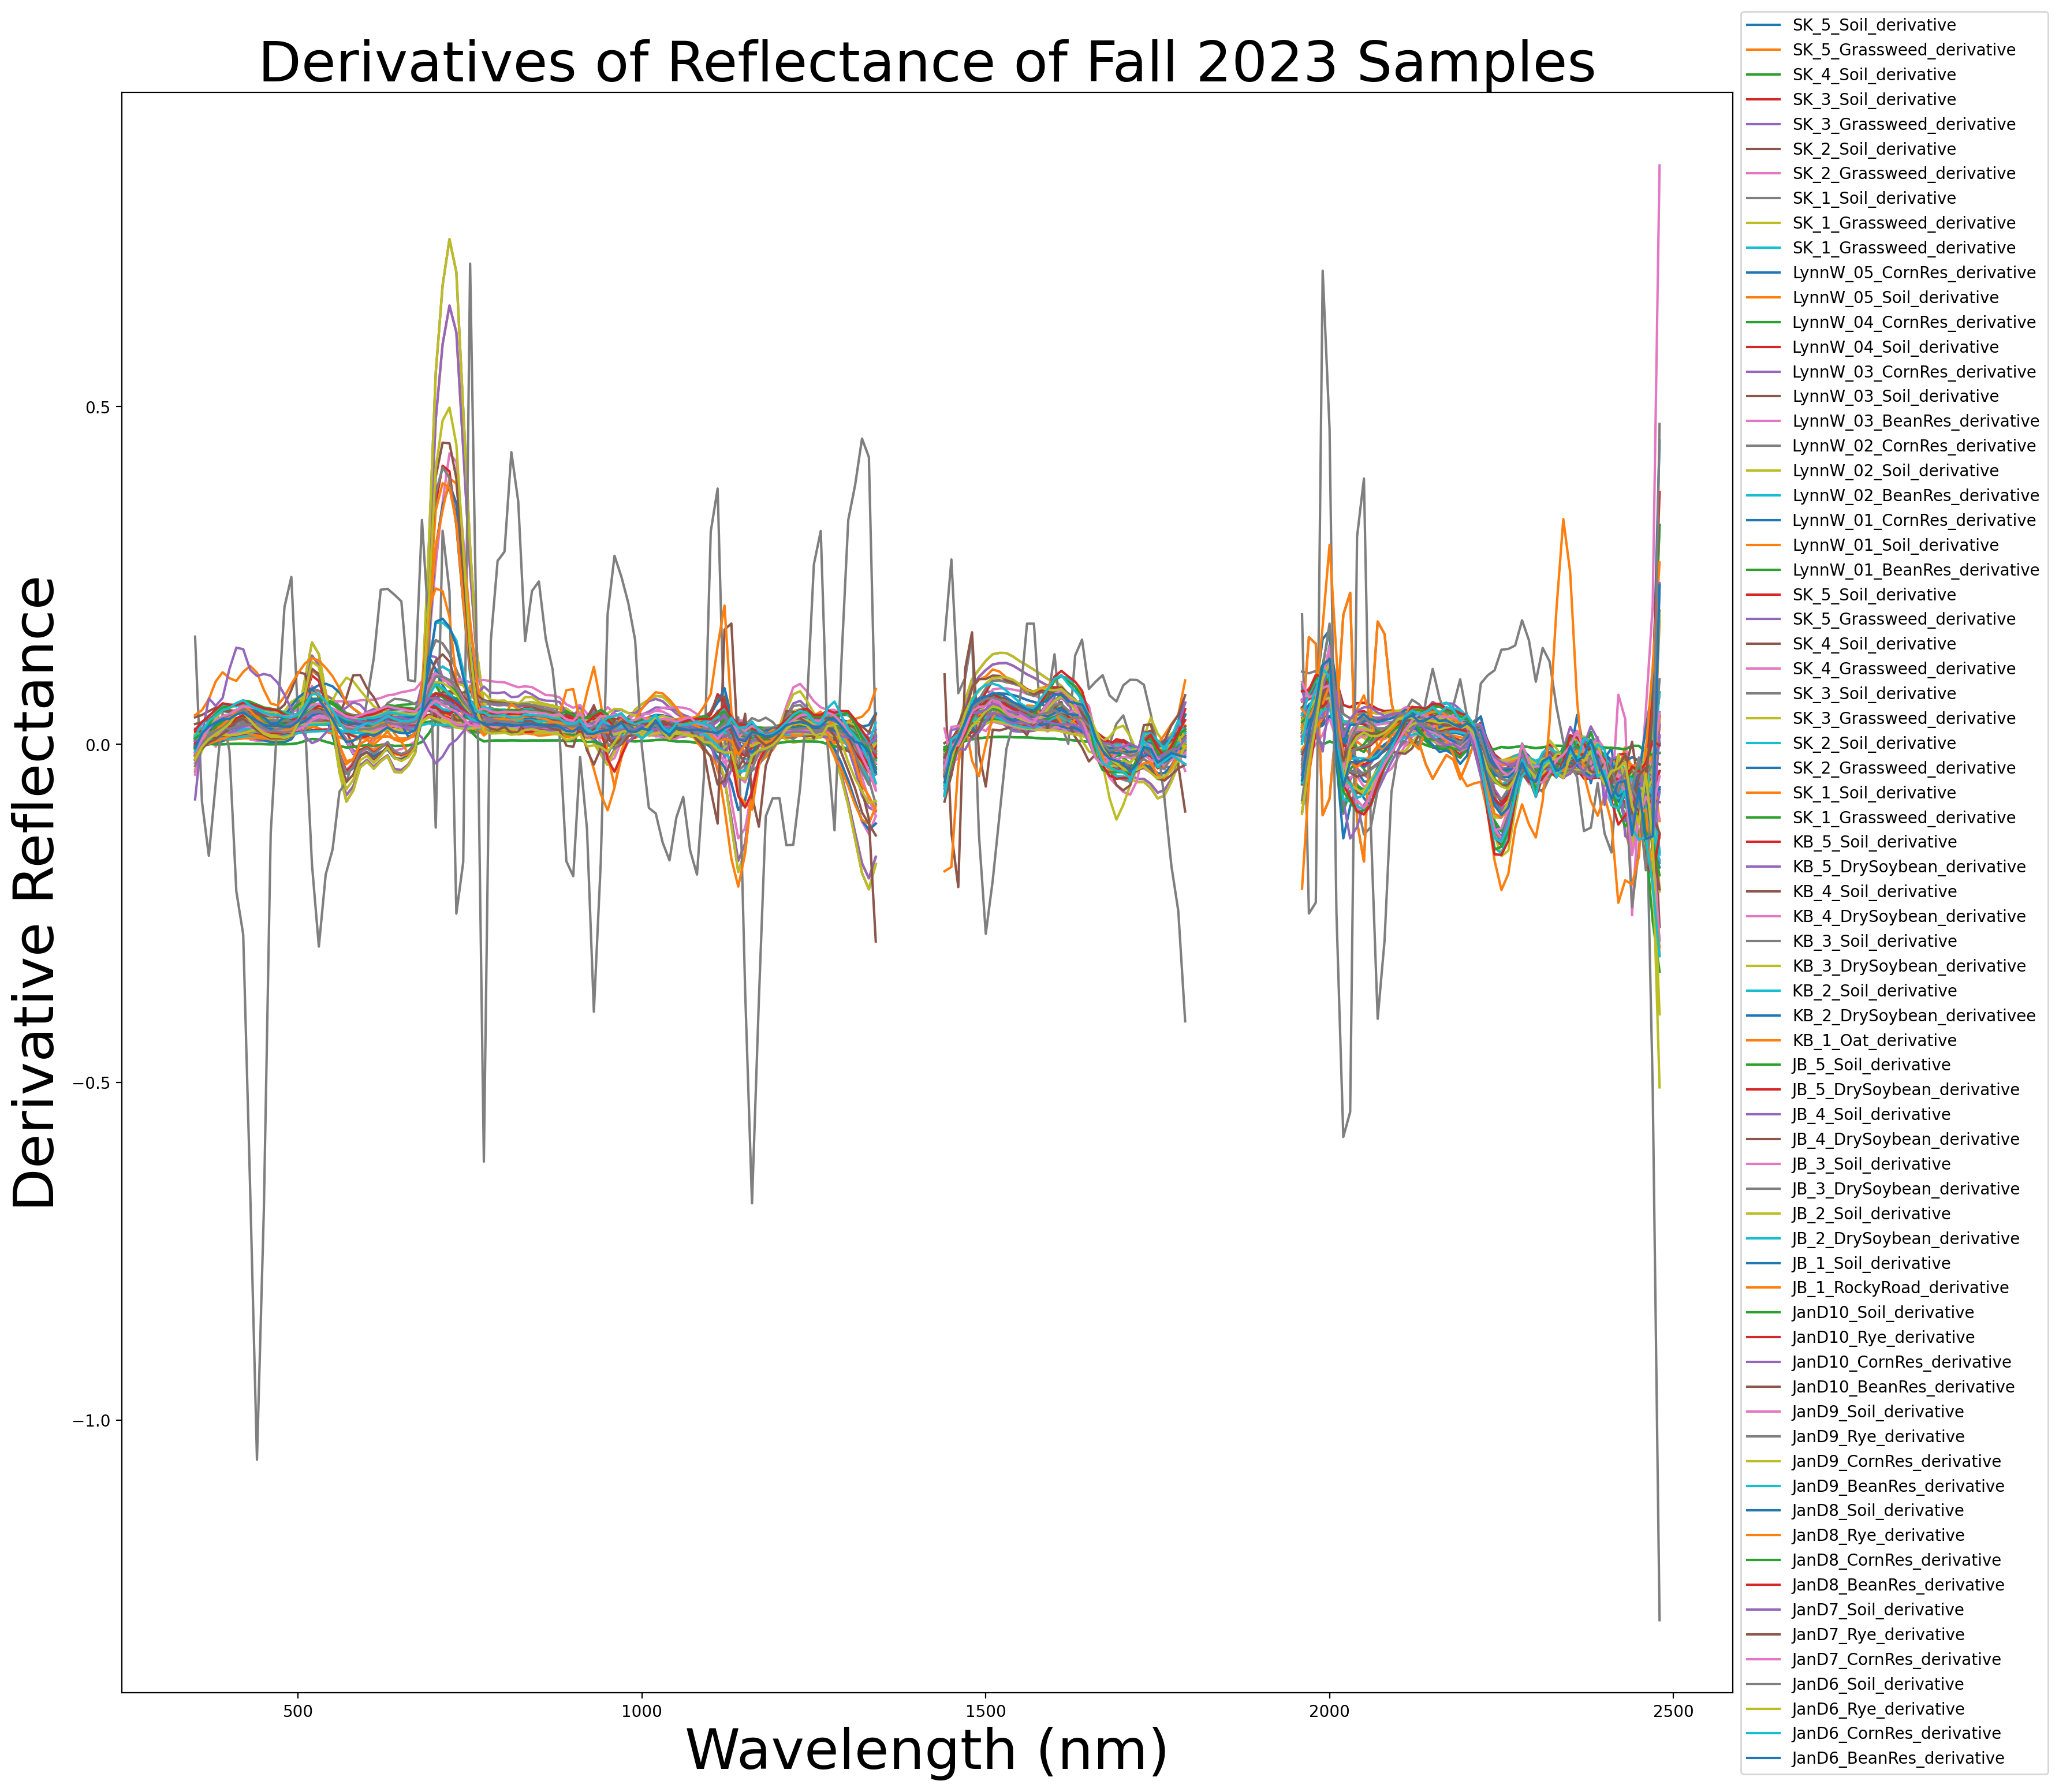

In [45]:

%config InlineBackend.figure_format='retina'
derivative_fall_2023.plot(figsize=(18,18), x="Wavelength", y=[
                                       'SK_5_Soil_derivative',
                                       'SK_5_Grassweed_derivative',
                                       'SK_4_Soil_derivative',
                                       'SK_3_Soil_derivative',
                                       'SK_3_Grassweed_derivative',
                                       'SK_2_Soil_derivative',
                                       'SK_2_Grassweed_derivative',
                                       'SK_1_Soil_derivative',
                                       'SK_1_Grassweed_derivative',
                                       'SK_1_Grassweed_derivative',
                                       'LynnW_05_CornRes_derivative',
                                       'LynnW_05_Soil_derivative',
                                       'LynnW_04_CornRes_derivative ' ,
                                       'LynnW_04_Soil_derivative ',
                                       'LynnW_03_CornRes_derivative ',
                                       'LynnW_03_Soil_derivative',
                                       'LynnW_03_BeanRes_derivative',
                                       'LynnW_02_CornRes_derivative ',
                                       'LynnW_02_Soil_derivative',
                                       'LynnW_02_BeanRes_derivative',
                                       'LynnW_01_CornRes_derivative ',
                                       'LynnW_01_Soil_derivative',
                                       'LynnW_01_BeanRes_derivative',
                                       'SK_5_Soil_derivative',
                                       'SK_5_Grassweed_derivative',
                                       'SK_4_Soil_derivative',
                                       'SK_4_Grassweed_derivative',
                                       'SK_3_Soil_derivative',
                                       'SK_3_Grassweed_derivative',
                                       'SK_2_Soil_derivative',
                                       'SK_2_Grassweed_derivative',
                                       'SK_1_Soil_derivative',
                                       'SK_1_Grassweed_derivative',
                                       'KB_5_Soil_derivative',
                                       'KB_5_DrySoybean_derivative',
                                       'KB_4_Soil_derivative',
                                       'KB_4_DrySoybean_derivative',
                                       'KB_3_Soil_derivative',
                                       'KB_3_DrySoybean_derivative',
                                       'KB_2_Soil_derivative ',
                                       'KB_2_DrySoybean_derivativee',
                                       'KB_1_Oat_derivative',
                                       'JB_5_Soil_derivative',
                                       'JB_5_DrySoybean_derivative',
                                       'JB_4_Soil_derivative',
                                       'JB_4_DrySoybean_derivative',
                                       'JB_3_Soil_derivative',
                                       'JB_3_DrySoybean_derivative',
                                       'JB_2_Soil_derivative',
                                       'JB_2_DrySoybean_derivative',
                                       'JB_1_Soil_derivative',
                                       'JB_1_RockyRoad_derivative',
                                       'JanD10_Soil_derivative',
                                       'JanD10_Rye_derivative',
                                       'JanD10_CornRes_derivative',
                                       'JanD10_BeanRes_derivative',
                                       'JanD9_Soil_derivative',
                                       'JanD9_Rye_derivative',
                                       'JanD9_CornRes_derivative',
                                       'JanD9_BeanRes_derivative',
                                       'JanD8_Soil_derivative',
                                       'JanD8_Rye_derivative',
                                       'JanD8_CornRes_derivative',
                                       'JanD8_BeanRes_derivative',
                                       'JanD7_Soil_derivative',
                                       'JanD7_Rye_derivative',
                                       'JanD7_CornRes_derivative',
                                       'JanD6_Soil_derivative',
                                       'JanD6_Rye_derivative',
                                       'JanD6_CornRes_derivative',
                                       'JanD6_BeanRes_derivative'



])
#plt.gca().get_legend(loc='center left')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Derivatives of Reflectance of Fall 2023 Samples", fontsize = '35')
plt.ylabel("Derivative Reflectance",fontsize = '35')
plt.xlabel("Wavelength (nm)",fontsize = '35')

***We want to explore the derivative spectra***

In [ ]:
''' we want to show the first 10 rows of the derivative spectra
'''
derivative_fall_2023.head(10)

,Wavelength,SK_5_Soil_derivative,SK_5_Grassweed_derivative,SK_4_Soil_derivative,SK_3_Soil_derivative,SK_3_Grassweed_derivative,SK_2_Soil_derivative,SK_2_Grassweed_derivative,SK_1_Soil_derivative,SK_1_Grassweed_derivative,...,JanD8_Rye_derivative,JanD8_CornRes_derivative,JanD8_BeanRes_derivative,JanD7_Soil_derivative,JanD7_Rye_derivative,JanD7_CornRes_derivative,JanD6_Soil_derivative,JanD6_Rye_derivative,JanD6_CornRes_derivative,JanD6_BeanRes_derivative
0,350,0.004125,-0.003776,0.006449,0.008792,-0.004964,-0.001516,-0.005223,-0.000440,-0.003958,...,-0.017463,0.008669,0.021669,-0.011717,-0.022712,-0.011918,-0.031828,-0.022296,-0.010436,-0.005281
1,360,0.009866,-0.001461,0.010533,0.015704,-0.001721,0.004770,-0.002405,0.002350,-0.000823,...,0.003279,0.016868,0.033363,0.002581,-0.006048,0.007680,-0.001988,-0.003546,0.018588,0.016322
2,370,0.015175,0.001155,0.015365,0.023457,0.001107,0.009401,-0.000036,0.004945,0.000646,...,0.015422,0.028844,0.041643,0.011163,0.002862,0.023268,0.014987,0.007973,0.035074,0.026484
3,380,0.020267,0.004351,0.020775,0.032484,0.005169,0.012796,0.002043,0.007016,0.000070,...,0.020867,0.044981,0.051720,0.017132,0.008011,0.034906,0.019924,0.015315,0.042441,0.032435
4,390,0.023273,0.009078,0.023271,0.038474,0.011353,0.014683,0.004689,0.007953,0.000158,...,0.029211,0.054828,0.060767,0.020109,0.015780,0.042241,0.024634,0.022175,0.050792,0.038156
5,400,0.022321,0.015248,0.022737,0.037615,0.018245,0.013893,0.009353,0.007540,0.000656,...,0.037892,0.056029,0.058987,0.017508,0.022605,0.044969,0.023211,0.030550,0.053790,0.037692
6,410,0.023330,0.022724,0.023502,0.038137,0.026365,0.014506,0.013993,0.007930,0.000934,...,0.050029,0.060185,0.058452,0.021211,0.033848,0.051276,0.025998,0.044789,0.061217,0.044467
7,420,0.027872,0.025230,0.026564,0.043892,0.028753,0.016762,0.014538,0.008963,0.001002,...,0.057328,0.065090,0.061307,0.026436,0.038198,0.056322,0.030191,0.047574,0.065277,0.047368
8,430,0.031442,0.018584,0.029982,0.047824,0.021118,0.017970,0.010767,0.009146,0.000613,...,0.050070,0.063285,0.059935,0.029208,0.029004,0.055085,0.028913,0.035815,0.057961,0.040481
9,440,0.031203,0.012120,0.030553,0.045918,0.014255,0.018118,0.007867,0.009437,0.000621,...,0.039417,0.059034,0.057014,0.030392,0.020834,0.052811,0.029126,0.024689,0.052389,0.034774


In [46]:
''' we want to export our result to excel
'''
derivative_fall_2023.to_excel("fall_2023_derivatives.xlsx")

#End Notes

You can plot either the 1 nm reflectance or the 10 nm reflectance if you want. Also, if you want to re-run any of the  block of codes, make sure to start from the begining to avoid repetition of commands.

Thanks,

Mohammed (mbraimah@kent.edu)